In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
filename = "../data/Klout_scores.csv"
klout = pd.read_csv(filename)

In [3]:
klout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Klout_score  1048 non-null   float64
dtypes: float64(1)
memory usage: 8.3 KB


In [4]:
klout.head()

,Klout_score
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [5]:
klout.describe()

,Klout_score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


array([[<AxesSubplot:title={'center':'Klout_score'}>]], dtype=object)

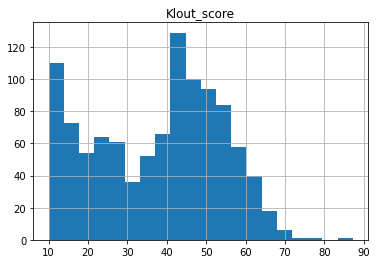

In [6]:
klout.hist(bins=20)

# Sampling distribution

In [7]:
def s_sample_mean(s_population, n):
    """For a sample of size n, calculate the standard deviation of the sample mean,
    given the standard deviation of the population.
    """
    return s_population / np.sqrt(n)


std = klout.std()[0]
s = s_sample_mean(std, 35)

print(s)

2.711984213749545


### `scipy.stats.norm.cdf`

```
Signature: st.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
```

In [8]:
z_score = (40 - 37.72) / 2.71

# Normal distribution 
1 - st.norm.cdf(z_score)

0.20008198863158877

In [9]:
# standard deviation of the mean of a random sample of 250 users
s = s_sample_mean(std, 250)

print(s)

1.0147315766190306


In [37]:
z_score = (40 - 37.72) / s
print("zscore = {:.3f}".format(z_score))

# Normal distribution 
1 - st.norm.cdf(z_score)

zscore = 2.247


0.012323221315361677

### `scipy.stats.norm.ppf`

```Signature: st.norm.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
```

In [14]:
st.norm.ppf(0.975)

1.959963984540054

In [23]:
print(40 - 1.96 * 1.015)
print(40 + 1.96 * 1.015)

38.0106
41.9894


In [21]:
st.norm.ppf(0.99)

2.3263478740408408

In [24]:
print(40 - 2.326 * 1.015)
print(40 + 2.326 * 1.015)

37.63911
42.36089


In [26]:
filename = "../data/Engagement ratio.csv"
engagement = pd.read_csv(filename)

In [27]:
engagement.describe()

,0.000149213
count,8.701000e+03
mean,7.727471e-02
std,1.072187e-01
min,2.730000e-10
25%,7.806609e-03
50%,3.614086e-02
75%,1.039751e-01
max,1.000000e+00


In [40]:
std = engagement.std()[0]
mean = engagement.mean()[0]
n = 20

In [37]:
sample_std = s_sample_mean(std, n)

print(sample_std)

0.023974829948189696


In [39]:
sample_mean = 0.13

print(sample_mean - 1.96 * sample_std)
print(sample_mean + 1.96 * sample_std)

0.0830093333015482
0.17699066669845182


In [41]:
sample_std = s_sample_mean(0.64, 20)

print(sample_std)


0.14310835055998652


In [42]:
sample_std = s_sample_mean(0.73, 20)

print(sample_std)


0.16323296235748463


In [44]:
(8.94 - 7.5) / 0.143

10.069930069930066

In [45]:
(8.35 - 8.2) / .163

0.9202453987730083

In [52]:
1 - st.norm.cdf(10.06)

0.0

In [53]:
1 - st.norm.cdf(.92)

0.17878637961437172

In [71]:
def ci(mean, std, confidence):
    '''Calculate the confidence interval for the specified normal distribution of N(mean, std)
    at given confidence.
    '''
    std_error = st.norm.ppf(confidence)
    return mean - std_error * std, mean + std_error * std

In [72]:
sample_mean = np.mean([8, 9, 12, 13, 14, 16])
sample_std = s_sample_mean(2.8, 6)

In [73]:
ci(sample_mean, sample_std, .975)

(9.759574551034188, 14.240425448965812)

In [64]:
sample_std = s_sample_mean(10, 25)

print(sample_std)

2.0


In [66]:
z_score = (75 - 68) / sample_std
print(z_score)

3.5


In [67]:
1 - st.norm.cdf(3.5)

0.0002326290790355401

In [75]:
ci(75, 2, .975)

(71.0800720309199, 78.9199279690801)

In [76]:
78.92 - 75

3.9200000000000017

In [78]:
st.norm.ppf(.995)

2.5758293035489004

In [79]:
sample_std = s_sample_mean(18, 9)

print(sample_std)

6.0


In [80]:
z_score = (175 - 180) / sample_std
print(z_score)

-0.8333333333333334


In [81]:
1 - st.norm.cdf(.833)

0.2024223646397234

In [82]:
ci(175, 6, .995)

(159.5450241787066, 190.4549758212934)